In [240]:
# %matplotlib qt


In [241]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from knn import KNN

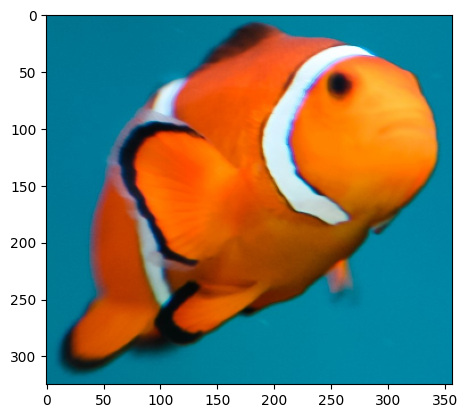

In [258]:
fish = cv2.imread('Inputs/clownfish.jpg')
fish = cv2.resize(fish, (0,0), fx=0.5, fy=0.5)
fish = cv2.cvtColor(fish, cv2.COLOR_BGR2RGB)
plt.imshow(fish)
plt.show()

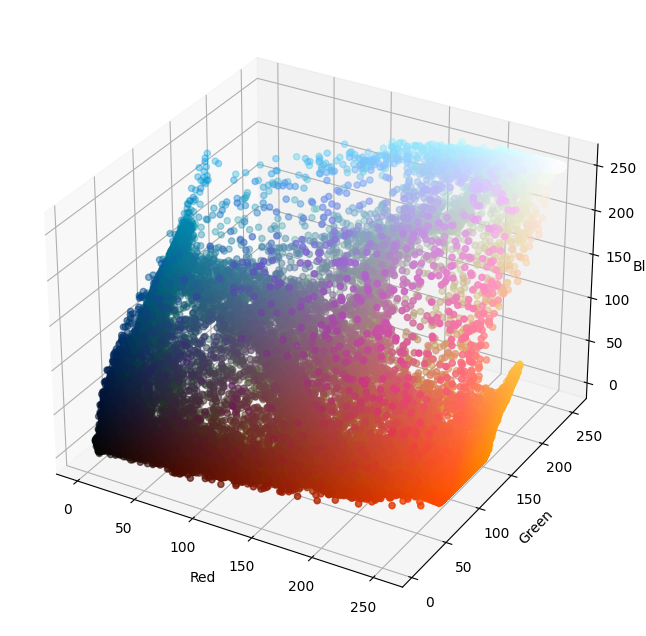

In [259]:
pixels_list_rgb = fish.reshape(-1, 3)

pixels_list_rgb.shape

fig = plt.figure(figsize=(8, 8))
ax =  fig.add_subplot(projection='3d')

ax.scatter(pixels_list_rgb[:, 0], pixels_list_rgb[:, 1], pixels_list_rgb[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [260]:
fish_hsv = cv2.cvtColor(fish, cv2.COLOR_BGR2HSV)


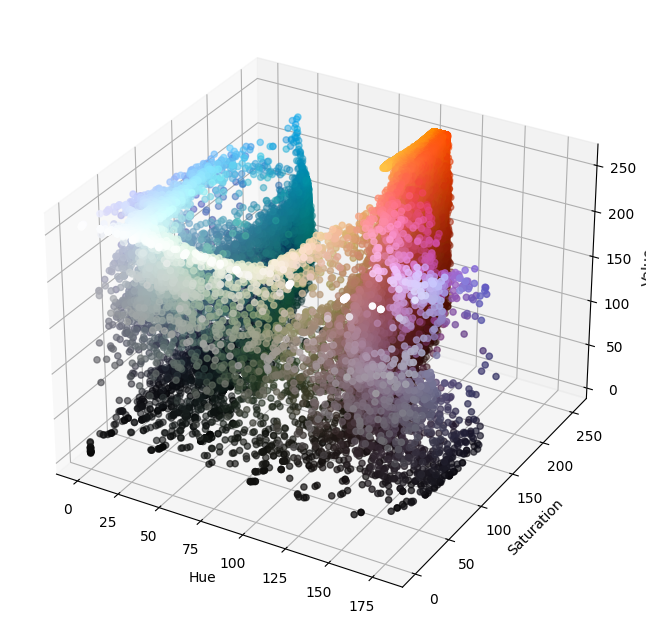

In [261]:
pixels_list_hsv = fish_hsv.reshape(-1, 3)

pixels_list_hsv.shape

fig = plt.figure(figsize=(8, 8))
ax =  fig.add_subplot(projection='3d')

ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show()

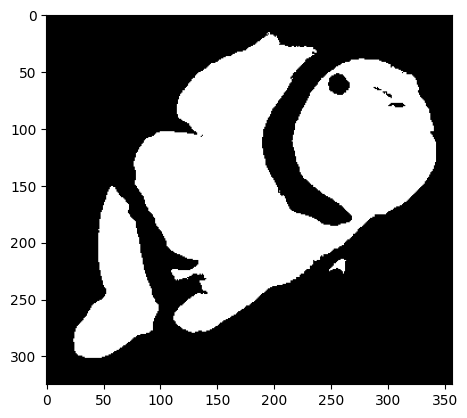

In [262]:
light_orenge = (50, 190, 120)
dark_orenge = (120, 255, 255)

mask_orange = cv2.inRange(fish_hsv, light_orenge, dark_orenge)
plt.imshow(mask_orange, cmap='gray')
plt.show()

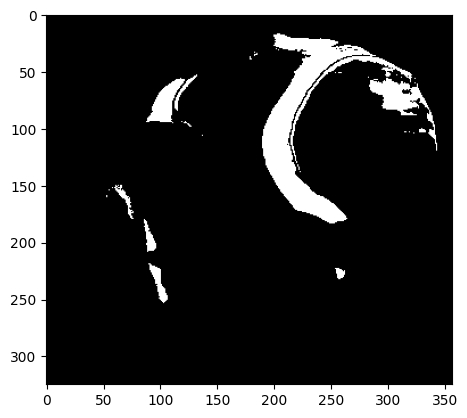

In [263]:
light_white = (0, 0, 180)
dark_white = (145, 200, 255)

mask_white = cv2.inRange(fish_hsv, light_white, dark_white)
plt.imshow(mask_white, cmap='gray')
plt.show()

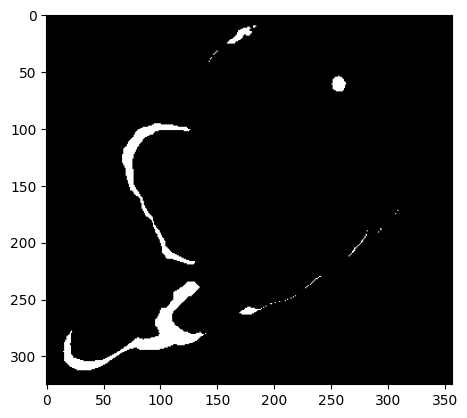

In [264]:
light_black = (0, 0, 0)
dark_black = (255, 255, 50)

mask_black = cv2.inRange(fish_hsv, light_black, dark_black)
plt.imshow(mask_black, cmap='gray')
plt.show()

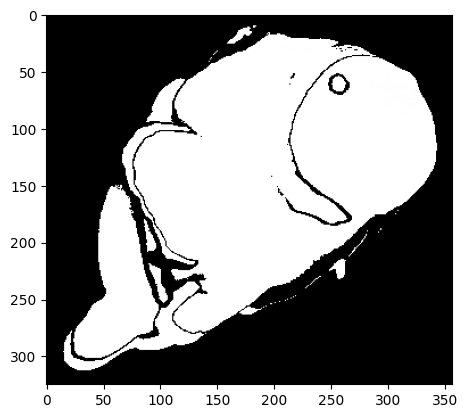

In [265]:
mask = mask_orange + mask_white + mask_black
plt.imshow(mask, cmap='gray')
plt.show()

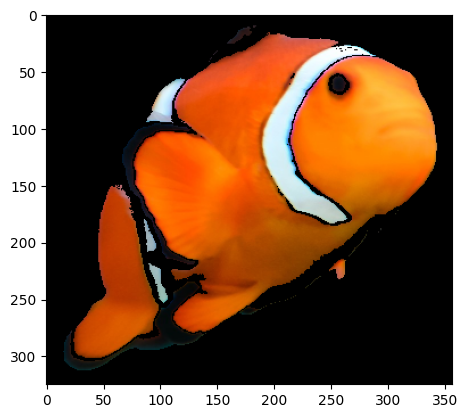

In [266]:
result = cv2.bitwise_and(fish, fish, mask=mask)
plt.imshow(result, cmap='gray')
plt.show()

In [267]:
X_train = pixels_list_hsv / 255
Y_train = mask.reshape(-1,) // 255

In [268]:
knn = KNN(K=3)
knn.fit(X_train, Y_train)

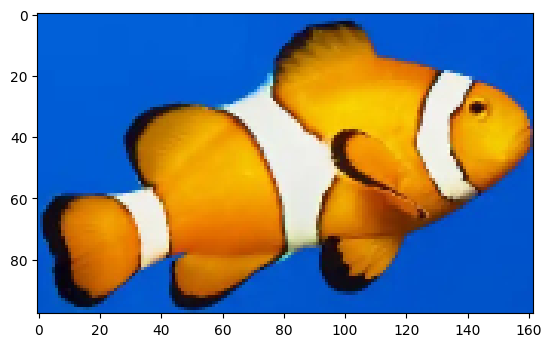

In [271]:
nemo = cv2.imread('Inputs/clownfish2.jpg')
nemo = cv2.resize(nemo, (0, 0), fx=0.3, fy=0.3)
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [272]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_BGR2HSV)

In [273]:
X_test = nemo_hsv.reshape(-1, 3) / 255
X_test.shape

(15876, 3)

In [ ]:
Y_pred = knn.predict(X_test)

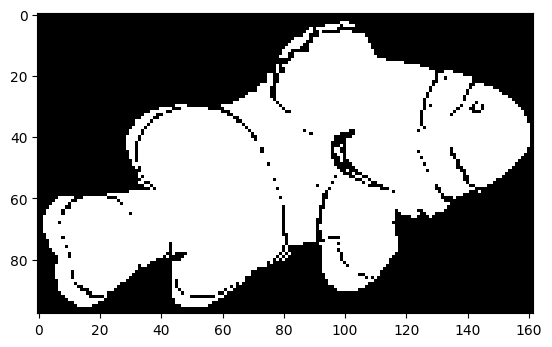

In [283]:
output = Y_pred.reshape(img.shape[:2])

plt.imshow(output, cmap='gray')
plt.savefig('Outputs/nemo_finder_mask.png')
plt.show()

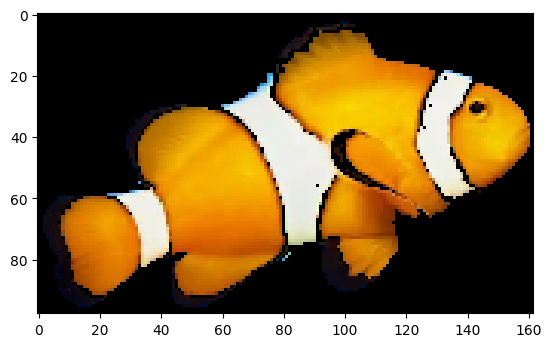

In [282]:
result = cv2.bitwise_and(nemo, nemo, mask=output)
plt.imshow(result, cmap='gray')
plt.savefig('Outputs/found_nemo')
plt.show()
